In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
s,r=df1.shape

(13320, 9)

In [4]:
df1.dropna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [5]:
df1.shape

(13320, 9)

Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [6]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

for col in df1.select_dtypes(include='object').columns:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

for col in df1.select_dtypes(include=['int64', 'float64']).columns:
    df1[col] = df1[col].fillna(df1[col].median())


df1['bhk'] = df1['size'].str.extract('(\d+)').astype(float)
df1['bhk'] = df1['bhk'].fillna(df1['bhk'].median())


def convert_sqft(value):
    try:
        if '-' in str(value):
            tokens = value.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(value)
    except:
        return None

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft)
df1['total_sqft'] = df1['total_sqft'].fillna(df1['total_sqft'].median())

print("\nAny remaining nulls?\n", df1.isnull().sum())


Any remaining nulls?
 area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pvams\AppData\Local\Temp\ipykernel_32192\4243770128.py:10: SyntaxWarning: invalid escape sequence '\d'
  df1['bhk'] = df1['size'].str.extract('(\d+)').astype(float)


In [7]:
#area 
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

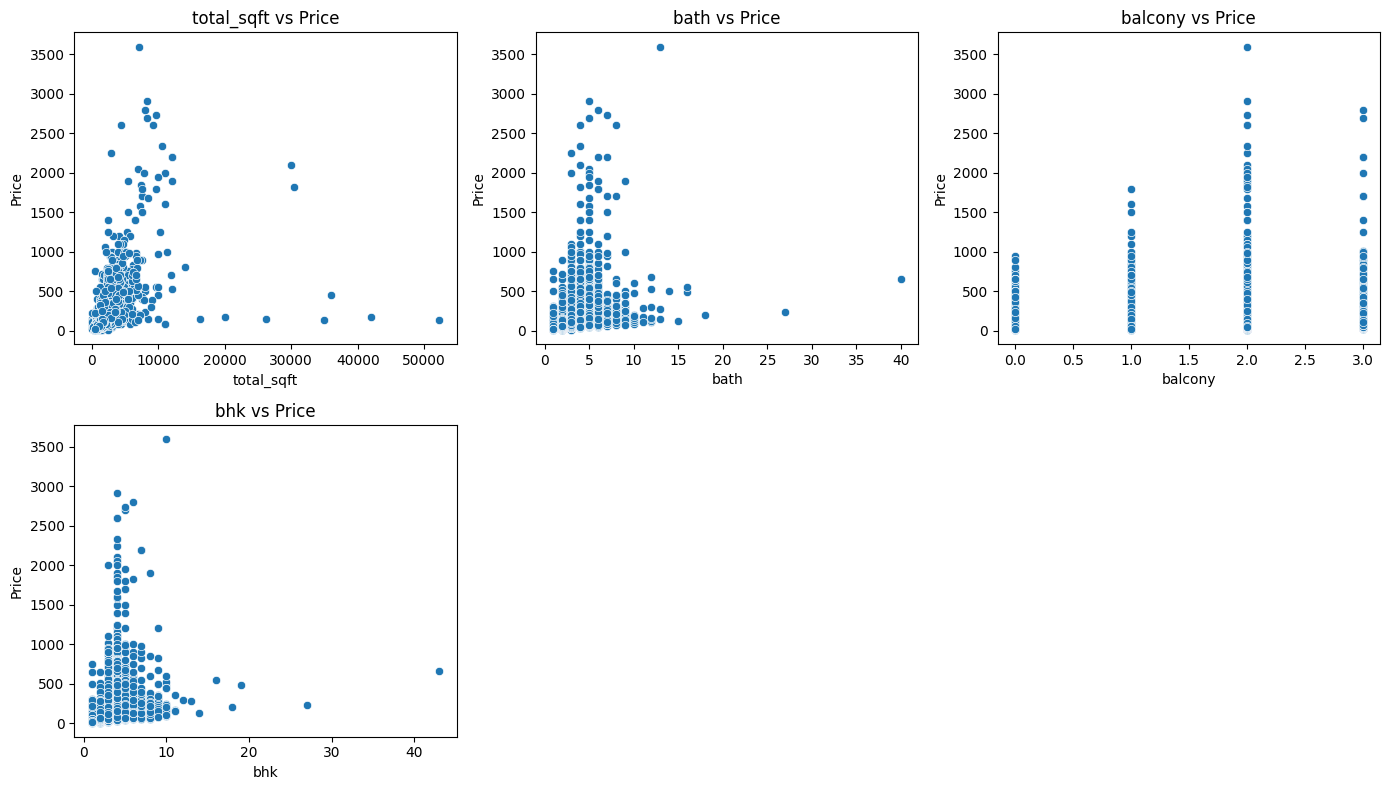

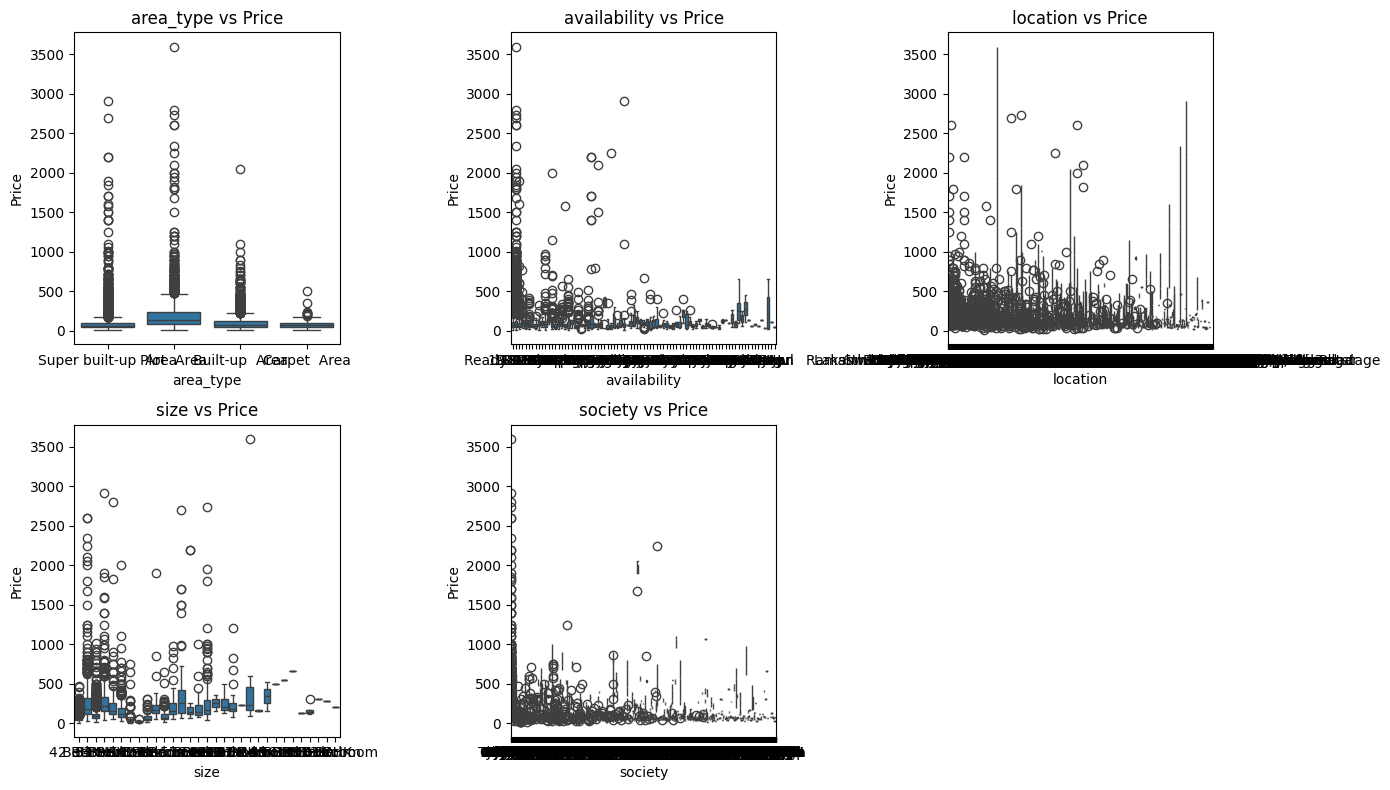

In [8]:
import matplotlib.pyplot as plt
# Identify numeric columns (excluding the 'price' column)
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('price')  # Removing 'price' from numeric columns if it's present

# Scatter plots for numeric columns vs price
plt.figure(figsize=(14, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of plots
    sns.scatterplot(x=df1[column], y=df1['price'])
    plt.title(f'{column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

# For categorical columns, box plot to show the distribution of 'price' by category
categorical_columns = df1.select_dtypes(include=['object']).columns.tolist()

# Ensure 'price' is not in the list of categorical columns
if 'price' in categorical_columns:
    categorical_columns.remove('price')

plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of plots
    sns.boxplot(x=df1[column], y=df1['price'])
    plt.title(f'{column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [9]:
#droping less impect columns
df2 = df1.drop(['area_type', 'society','balcony','availability'], axis="columns")
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


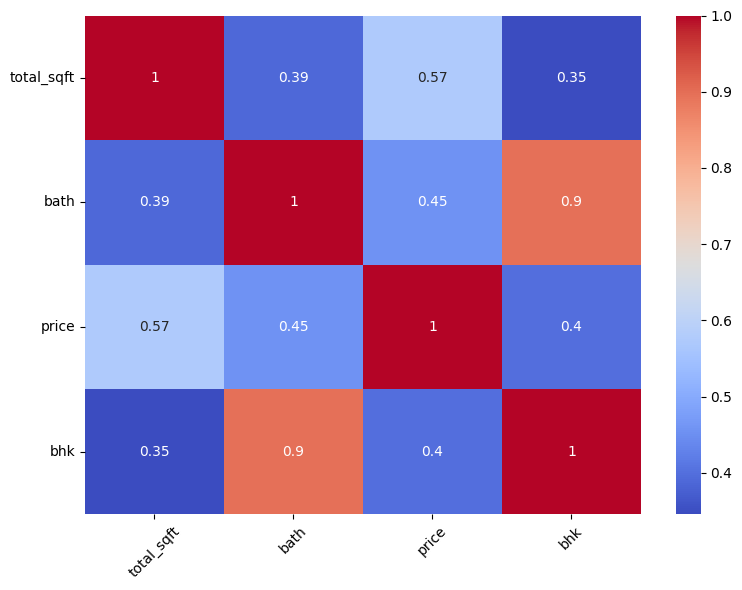

In [10]:


numeric_df = df2.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [12]:
df2.dropna()
df2.shape
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [13]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and ' ' in x else None)


In [15]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43


In [18]:
def is_float(x):
	try:
		float(x)
	except:
		return False
	return True

In [23]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk


In [20]:
#converting the sqrt data into numarical
def convert_sqft_to_num(x):
	tokens = x.split('-')
	if len(tokens)==2:
		return float(float(tokens[0]) + float(tokens[1]))/2
	try:
		return float(x)
	except:
		return None

In [21]:
df2.total_sqft

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [24]:

df2.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [25]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

Add new feature called price per square feet

In [26]:
#feature engineering pcs 
df4 = df2.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1305,), dtype=object)

In [28]:
#df4.location = df4.location.apply(lambda x : x.strip())
location_stats = df4.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield              541
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
 Whitefield               1
 Sector 1 HSR Layout      1
 Bhoganhalli              1
 Basavangudi              1
 Banaswadi                1
Name: location, Length: 1305, dtype: int64

C:\Users\pvams\AppData\Local\Temp\ipykernel_32192\3641053908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


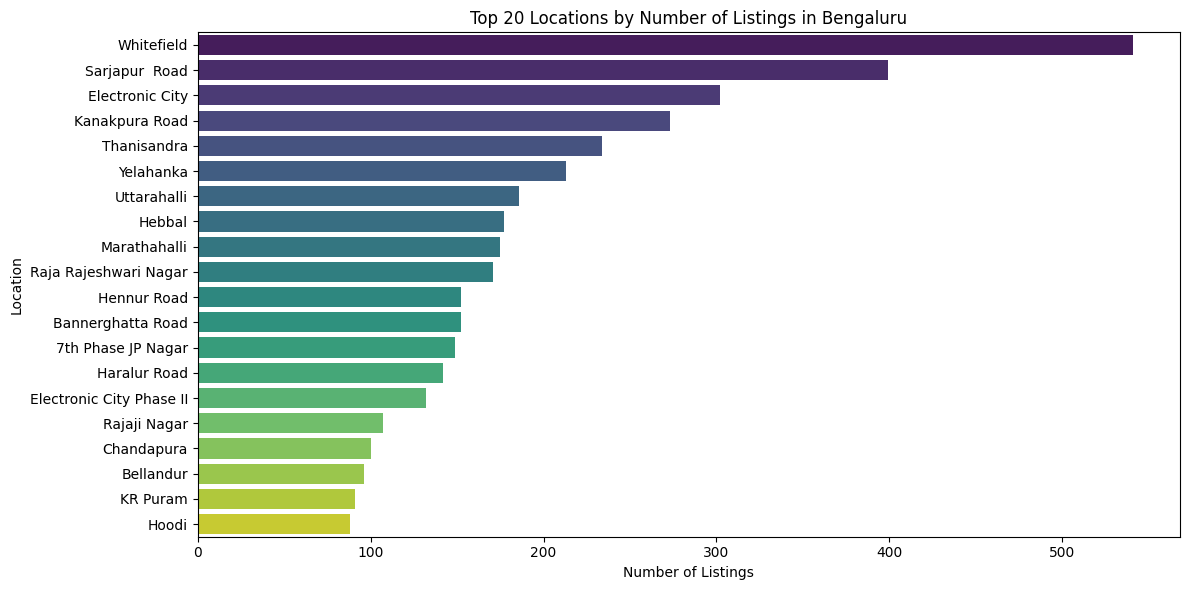

In [29]:
# Get top 20 locations
top_locations = location_stats.head(20)

# Set the plot size
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')

# Add labels and title
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.title("Top 20 Locations by Number of Listings in Bengaluru")

plt.tight_layout()
plt.show()

In [30]:
len(location_stats[location_stats<=10])

1064

Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [31]:
location_less_10 = location_stats[location_stats<=10]
location_less_10

location
Gunjur Palya             10
1st Block Koramangala    10
Ganga Nagar              10
Kalkere                  10
Basapura                 10
                         ..
 Whitefield               1
 Sector 1 HSR Layout      1
 Bhoganhalli              1
 Basavangudi              1
 Banaswadi                1
Name: location, Length: 1064, dtype: int64

In [32]:
len(df4.location.unique())
df4.location = df4.location.apply(lambda x : 'other' if x in location_less_10 else x)
len(df4.location.unique())

242

In [33]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Outlier Removal Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft. This is a business logic based outlier removal. We will use this logic to remove outliers from our

In [34]:
#ananysing outliers
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12568, 7)

In [36]:
df5.price_per_sqft.describe()

count     12568.000000
mean       6313.436790
std        4174.854291
min         267.829813
25%        4209.344773
50%        5295.544522
75%        6927.325006
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#almost removed 2 thousand outliers

In [ ]:
#Outlier Removal Using Standard Deviation and Mean
def remove_pps_outliers(df):
	df_out = pd.DataFrame()
	for key, subdf in df.groupby('location'):
		m = np.mean(subdf.price_per_sqft)
		sd = np.std(subdf.price_per_sqft)
		reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
		df_out = pd.concat([df_out,reduced_df],ignore_index=True)
	return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10355, 7)

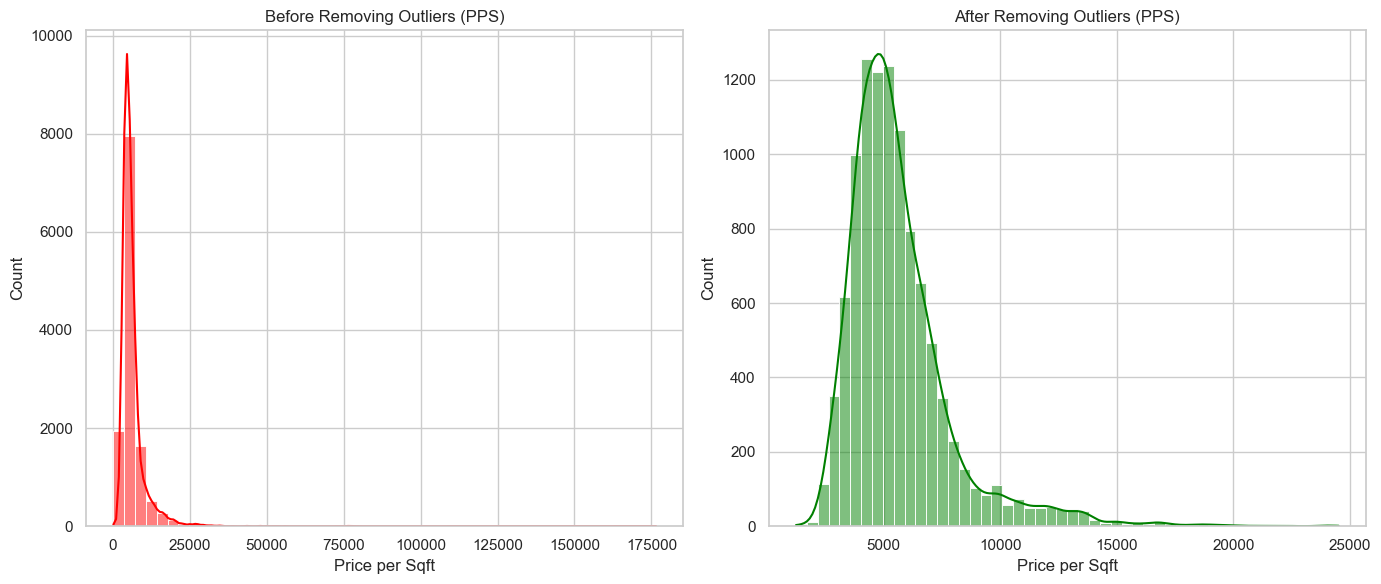

In [67]:


# Optional: To make sure seaborn looks nice
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Subplot 1: Before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(df5['price_per_sqft'], bins=50, kde=True, color='red')
plt.title("Before Removing Outliers (PPS)")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

# Subplot 2: After removing outliers
plt.subplot(1, 2, 2)
sns.histplot(df6['price_per_sqft'], bins=50, kde=True, color='green')
plt.title("After Removing Outliers (PPS)")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


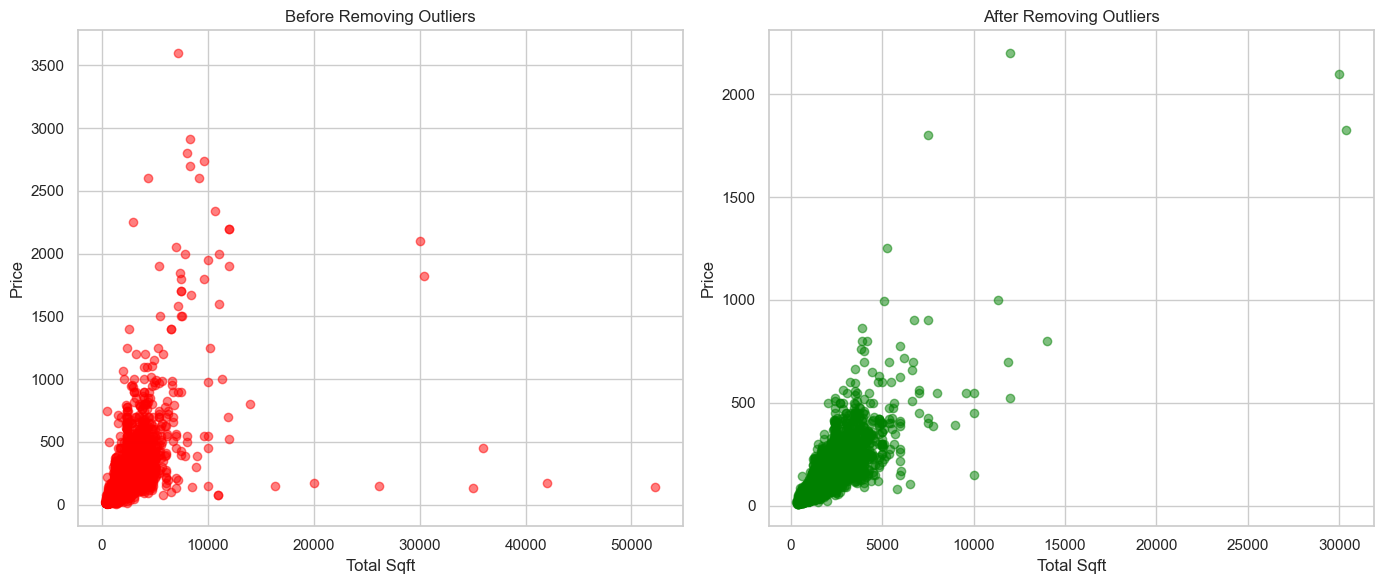

In [68]:


plt.figure(figsize=(14, 6))

# Before removing outliers
plt.subplot(1, 2, 1)
plt.scatter(df5['total_sqft'], df5['price'], alpha=0.5, c='red')
plt.title('Before Removing Outliers')
plt.xlabel('Total Sqft')
plt.ylabel('Price')

# After removing outliers
plt.subplot(1, 2, 2)
plt.scatter(df6['total_sqft'], df6['price'], alpha=0.5, c='green')
plt.title('After Removing Outliers')
plt.xlabel('Total Sqft')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

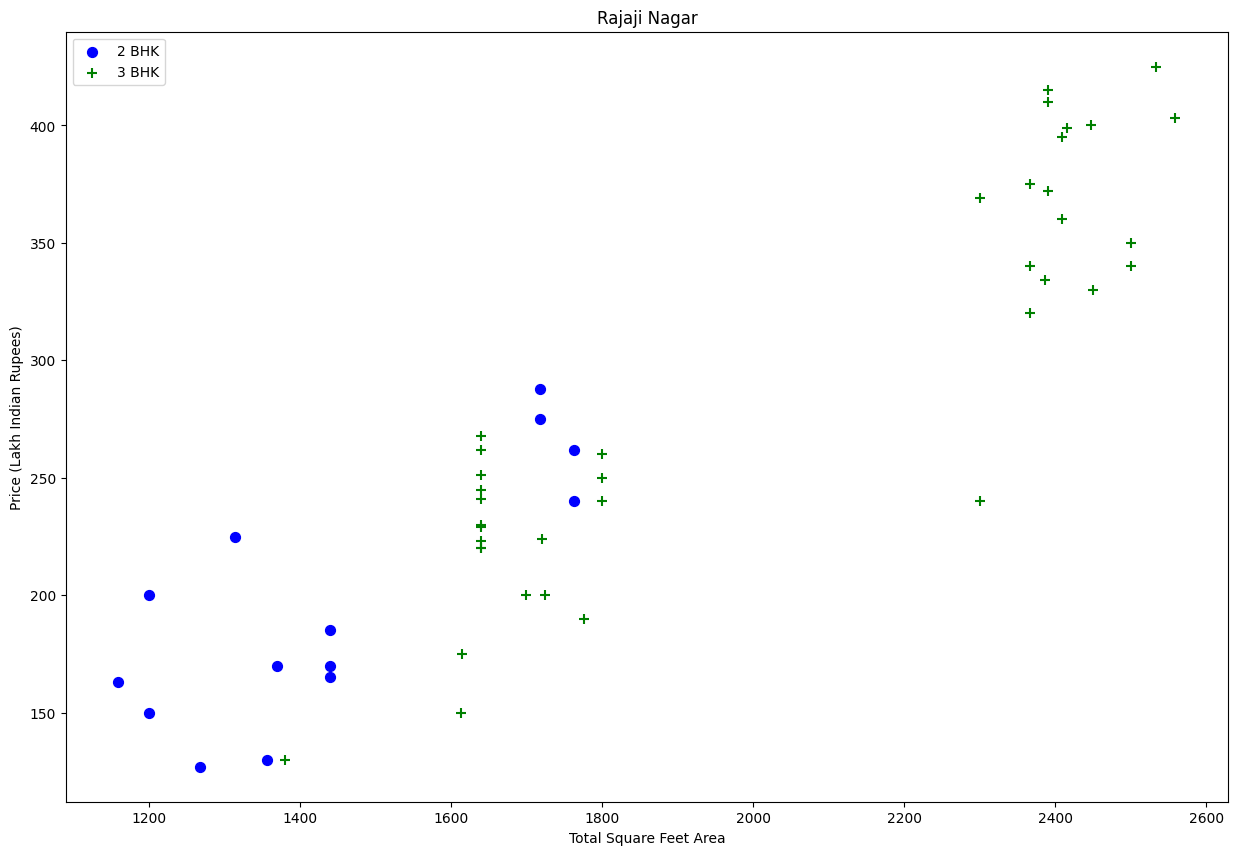

In [39]:
#scatter flot
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

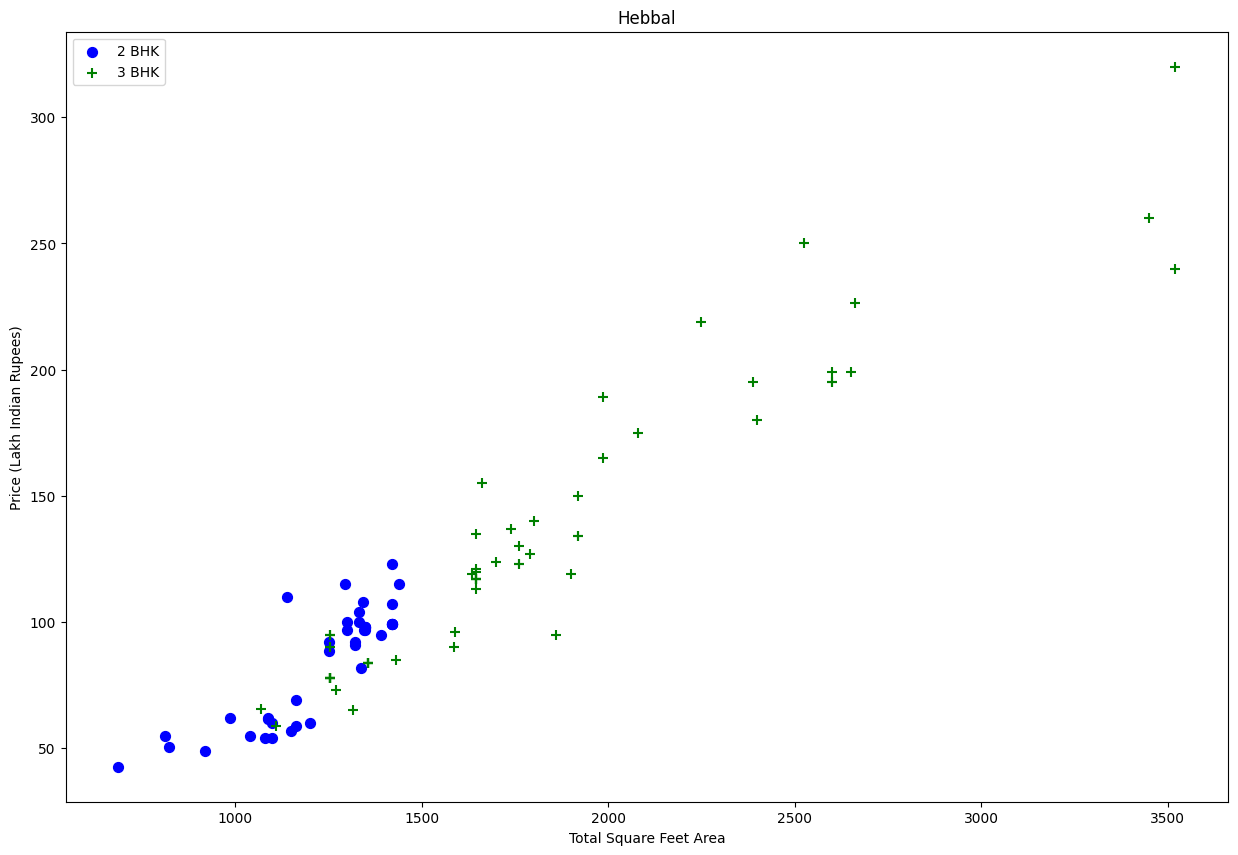

In [40]:
plot_scatter_chart(df6,"Hebbal")

In [41]:
df6.shape

(10355, 7)

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7388, 7)

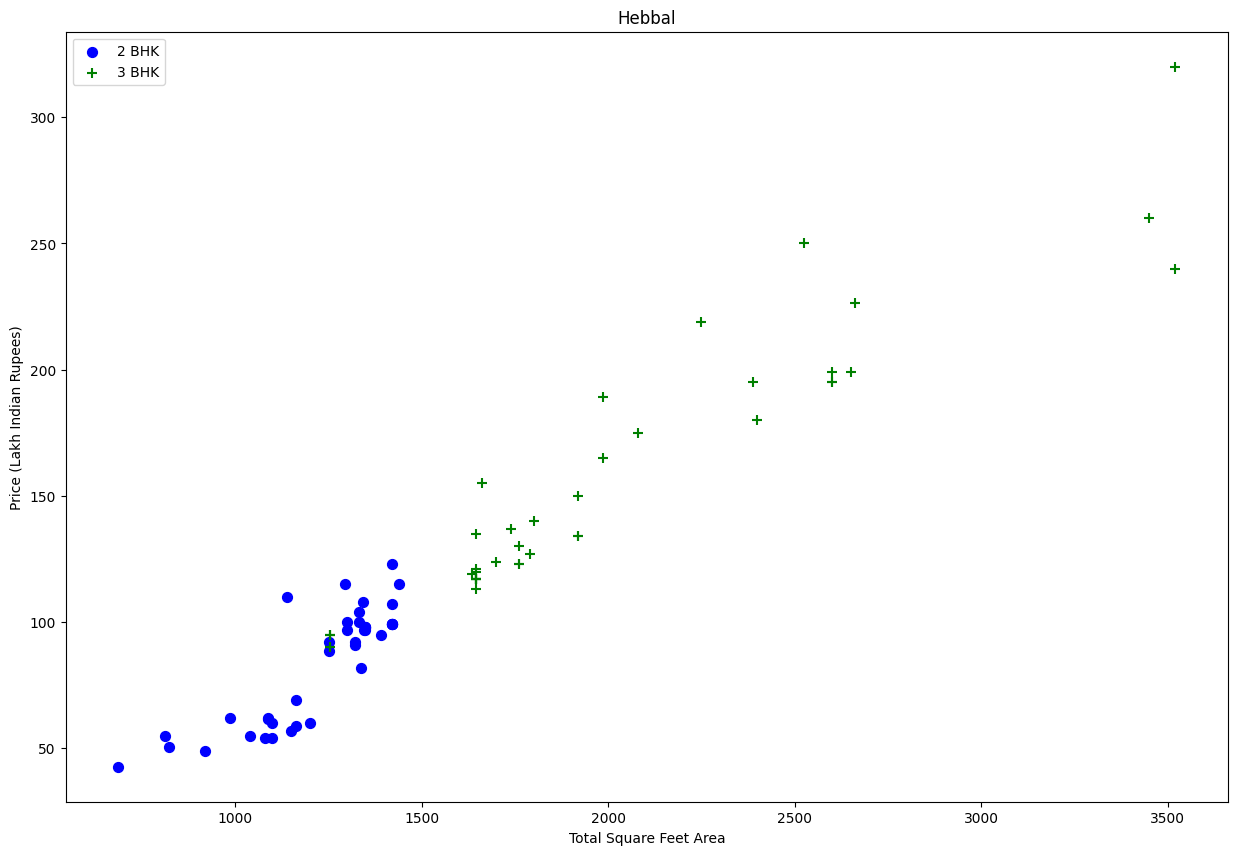

In [43]:
plot_scatter_chart(df7,'Hebbal')

Text(0, 0.5, 'count')

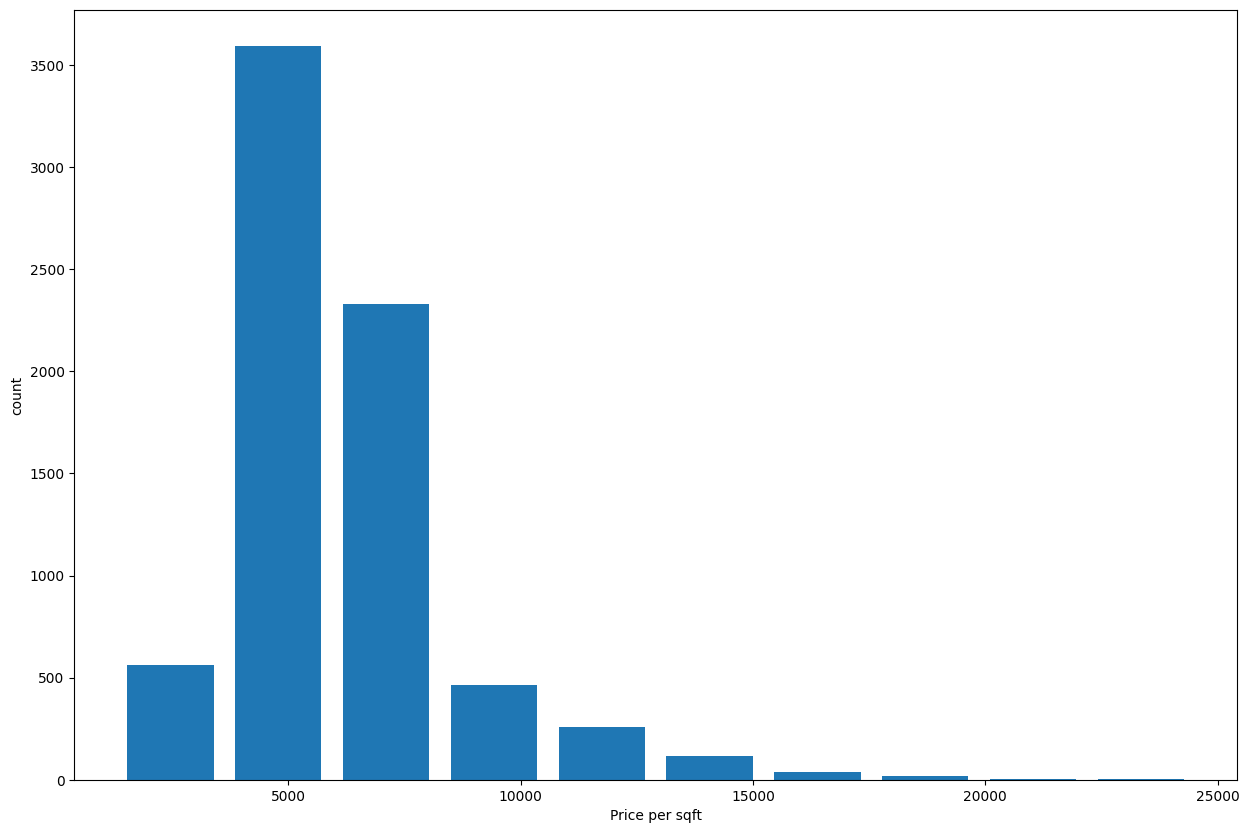

In [44]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('count')

In [45]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

#removing the bath > bedroom

Text(0, 0.5, 'Count')

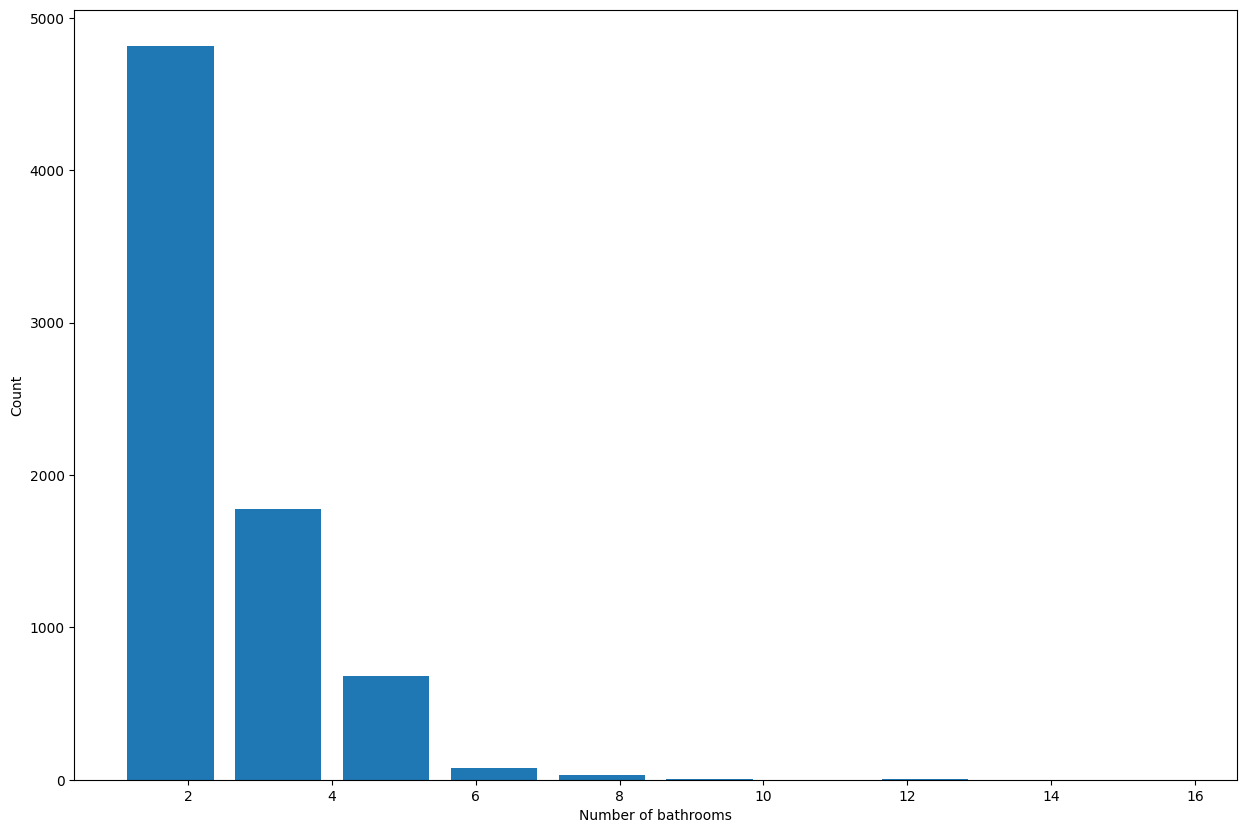

In [46]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [47]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7309, 7)

In [48]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [50]:
#onehot encoding
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
#builting a model
df11.shape

(7309, 245)

In [54]:
X = df11.drop('price',axis='columns')
X

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10347,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10350,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10351,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
y = df11.price

In [57]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test = train_test_split(X,y)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
accurancy =lr_clf.score(X_test,y_test)#return r2 value
accurancy

0.7909808032768767

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=6,test_size=0.2,random_state=0)
scores = cross_val_score(LinearRegression(),X,y,cv=cv)
scores

array([0.82500466, 0.85994526, 0.85694919, 0.82766888, 0.85521035,
       0.80944549])

In [60]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {  # 'normalize' is removed
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'absolute_error'],  # Fixed values
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call function
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.845479,{'fit_intercept': False}
1,lasso,0.694293,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.752461,"{'criterion': 'absolute_error', 'splitter': 'b..."


In [61]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

np.int64(6)

In [62]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert to DataFrame with correct column names
    x_df = pd.DataFrame([x], columns=X.columns)

    return float(lr_clf.predict(x_df)[0]) 

In [63]:
pri = str(predict_price('1st Phase JP Nagar',1000, 3, 3))+"  lakhs"
pri

'87.53614540580357  lakhs'

In [64]:
predict_price('Indira Nagar',1000, 2, 2)

169.73971949744458

In [65]:
import pickle
with open('banglore_home_model.pickle','wb') as f:
	pickle.dump(lr_clf,f)  # dump the model to the file

In [ ]:
import json
columns = {
	'data_columns' : [ col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
	f.write(json.dumps(columns))